In [1]:
import pandas as pd

In [3]:
dados = pd.read_excel("C:/Users/Salomão/Downloads/gaf_esp.xlsx")
dados.head()

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
0,Gafanhoto,0.50,7.0
1,Gafanhoto,0.50,6.0
2,Gafanhoto,0.60,5.5
3,Gafanhoto,0.65,4.5
4,Gafanhoto,0.54,3.2


In [5]:
dados.tail()

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
95,Esperança,9.75,6.2
96,Esperança,6.20,8.1
97,Esperança,9.20,4.7
98,Esperança,9.10,6.0
99,Esperança,8.29,7.0


In [7]:
dados.Espécie.value_counts()

Espécie
Gafanhoto    50
Esperança    50
Name: count, dtype: int64

In [11]:
dados.groupby('Espécie').describe()

Comprimento do Abdômen                                              \
                           count    mean       std  min    25%    50%    75%   
Espécie                                                                        
Esperança                   50.0  8.1206  1.129729  5.4  7.225  8.200  9.000   
Gafanhoto                   50.0  1.7518  0.786941  0.5  1.200  1.685  2.415   

                Comprimento das Antenas                                       \
            max                   count    mean       std   min    25%   50%   
Espécie                                                                        
Esperança  10.0                    50.0  7.2156  1.334945  4.50  6.205  7.00   
Gafanhoto   3.6                    50.0  3.5492  1.417861  0.89  2.550  3.77   

                     
           75%  max  
Espécie              
Esperança  8.2  9.7  
Gafanhoto  4.3  7.0

In [17]:
dados.shape

(100, 3)

<Axes: xlabel='Comprimento do Abdômen', ylabel='Comprimento das Antenas'>

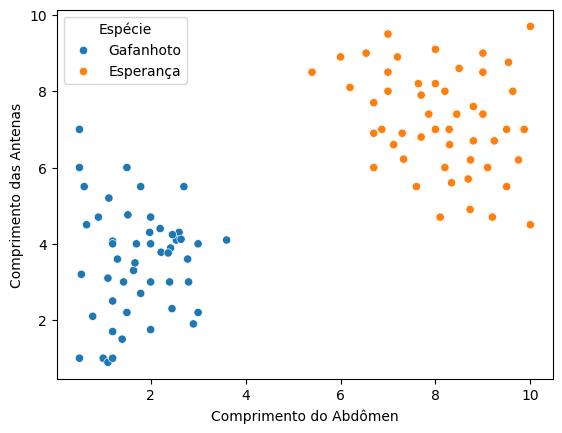

In [22]:
import seaborn as sns
sns.scatterplot(data=dados,x='Comprimento do Abdômen',y='Comprimento das Antenas',hue='Espécie')

In [26]:
from sklearn import * #importa tudo da biblioteca  sklearn

In [54]:
import numpy as np 

seed = 42
np.random.seed(seed)

In [56]:
from sklearn.model_selection import train_test_split

x = dados[["Comprimento do Abdômen","Comprimento das Antenas"]] 
y = dados["Espécie"]

In [98]:
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y,test_size=0.2)#stratify equilibra as classes de acordo com o y(no caso,target)

In [100]:
x.shape

(100, 2)

In [102]:
x_teste.shape

(20, 2)

In [104]:
len(x_treino)

80

In [108]:
list(y_treino).count("Gafanhoto")

42

In [110]:
list(y_treino).count("Esperança")

38

In [141]:
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y,test_size=0.2,stratify = y,random_state=seed)

In [143]:
list(y_treino).count("Gafanhoto")

40

In [145]:
list(y_treino).count("Esperança")#os dados ficaram proporcionais utilizando o stratify

40

In [147]:
x_treino#dados estão embaralhados

,Comprimento do Abdômen,Comprimento das Antenas
65,6.70,6.9
2,0.60,5.5
10,1.40,1.5
16,2.00,4.0
18,1.20,2.5
...,...,...
67,7.00,8.5
86,8.73,4.9
35,1.79,2.7
71,8.20,8.0


In [155]:
from sklearn.neighbors import KNeighborsClassifier


# Hiperparametro do nosso modelo é o número de vizinhos considerados (n_neighbors)
modelo_classificador = KNeighborsClassifier(n_neighbors=3)

# Está fazendo o treinamento do meu modelo de ML
modelo_classificador.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=3)

In [171]:
# Comprimento de abdomen: 2
# Comprimento de antena: 7
modelo_classificador.predict([[2,7]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Gafanhoto'], dtype=object)

In [159]:
from sklearn.metrics import accuracy_score

In [163]:
y_predito = modelo_classificador.predict(x_teste)

In [165]:
accuracy_score(y_true = y_teste, y_pred=y_predito)

1.0